In [0]:
# Импорт библиотек
import numpy
import pandas as pd

In [0]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [0]:
# Задаем рабочую папку
import os
os.chdir("/content/sample_data")


In [0]:
# Импорт данных
competitions_df = pd.read_csv('stg_Competitions_etl_results.csv', sep=',', parse_dates=[ 'date'])

# 'result' - тип time 

In [132]:
#  Знакомимся с данными
competitions_df.dtypes


place                        int64
last_name                   object
first_name                  object
birth_year                   int64
city                        object
team                        object
country                     object
result                      object
disc                        object
points                     float64
athlete_group               object
distance                     int64
style                       object
date                datetime64[ns]
pool_city                   object
pool_description            object
id                           int64
dtype: object

In [174]:
#  Знакомимся с данными
competitions_df.head()
#competitions_df.tail()
#competitions_df.shape

,place,last_name,first_name,birth_year,city,team,country,result,disc,points,athlete_group,distance,style,date,pool_city,pool_description,id
0,1,Евмененко,София,2007,Долгопрудный,ДЮСШ,RUS,00:00:33.50,NaN,387.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,8
1,2,Редюк,Алина,2007,Гомель-1,ГОЦОР ввс,BLR,00:00:35.44,NaN,327.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,9
2,3,Козловская,Кристина,2007,Минск,Волна,BLR,00:00:36.10,NaN,309.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,10
3,4,Карпочева,Екатерина,2007,Речица,Олимп,BLR,00:00:36.62,NaN,296.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,11
4,5,Гисак,Анна,2007,Могилев,СДЮШОР,BLR,00:00:36.96,NaN,288.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,12


**Первые наблюдения**

1. строковое значение в поле pool_description плохо подходит для обработки данных

2. несмотря на то, что значения в result выглядят корректно - это тоже строки (расчеты затруднены)

3. Информацию о поле спортсмена сложно определить (надо парсить athlet_group)

In [175]:
# посмотрим какие значения находятся в поле pool_description

competitions_df['pool_description'].unique()

array(['бассейн 50м.'], dtype=object)

**pool_size**

In [176]:
# для удобства последующей работы добавим новое поле pool_size (калькулируемое, на базе pool_description)

competitions_df['pool_size'] = 'NaN'
competitions_df.loc[competitions_df['pool_description'] == 'бассейн 50м.', 'pool_size'] = 50
competitions_df.head(3)

,place,last_name,first_name,birth_year,city,team,country,result,disc,points,athlete_group,distance,style,date,pool_city,pool_description,id,pool_size
0,1,Евмененко,София,2007,Долгопрудный,ДЮСШ,RUS,00:00:33.50,NaN,387.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,8,50
1,2,Редюк,Алина,2007,Гомель-1,ГОЦОР ввс,BLR,00:00:35.44,NaN,327.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,9,50
2,3,Козловская,Кристина,2007,Минск,Волна,BLR,00:00:36.10,NaN,309.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,10,50


**result_s**

In [0]:
# создаем поле для хранения результата в секундах

competitions_df['result_s'] = 'NaN'

In [178]:
# делаем конвертацию из строки в секунды

for ix in range(len(competitions_df)):
  result = str(competitions_df.loc[ix, 'result'])
  if result == 'nan': 
    continue
    
  hh, mm, ss = map(float, result.split(':'))
  result_s = hh*3600+mm*60+ss
  competitions_df.loc[ix, 'result_s'] = result_s

competitions_df.tail(3)

,place,last_name,first_name,birth_year,city,team,country,result,disc,points,athlete_group,distance,style,date,pool_city,pool_description,id,pool_size,result_s
1367,63,Терешкин,Егор,2005,Гомель-2,ГОЦОР ввс,BLR,00:03:10.56,NaN,214.0,Юноши 2004-2005г.р.,200,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1462,50,190.56
1368,64,Бурлаков,Андрей,2005,Гомель,СДЮШОР 7,BLR,00:03:14.46,NaN,201.0,Юноши 2004-2005г.р.,200,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1463,50,194.46
1369,65,Калугин,Георгий,2004,Долгопрудный,ДЮСШ,RUS,NaN,DSQ,NaN,Юноши 2004-2005г.р.,200,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1464,50,NaN


**gender**

In [179]:
# перечень групп, на основании которых можно определить пол спортсмена

competitions_df['athlete_group'].unique()

array(['Девочки 2007г.р. и моложе', 'Мальчики 2007г.р. и моложе',
       'Девочки 2006 г.р.', 'Мальчики 2006 г.р.',
       'Девушки 2004-2005 г.р.', 'Юноши 2004-2005 г.р.',
       'Девочки 2006г.р.', 'Мальчики 2006г.р.', 'Юноши 2004',
       'Девушки 2004-2005 г.р', 'Девушки 2004-2005г.р.',
       'Юноши 2004-2005г.р.'], dtype=object)

In [180]:
# размечаем данные (пол спортсмена по его группе)

group_gender_dict = dict(zip(list(competitions_df['athlete_group'].unique()), ['Д', 'М', 'Д', 'М', 'Д', 'М', 'Д', 'М', 'М', 'Д', 'Д', 'М']))

print(group_gender_dict)

{'Девочки 2007г.р. и моложе': 'Д', 'Мальчики 2007г.р. и моложе': 'М', 'Девочки 2006 г.р.': 'Д', 'Мальчики 2006 г.р.': 'М', 'Девушки 2004-2005 г.р.': 'Д', 'Юноши 2004-2005 г.р.': 'М', 'Девочки 2006г.р.': 'Д', 'Мальчики 2006г.р.': 'М', 'Юноши 2004': 'М', 'Девушки 2004-2005 г.р': 'Д', 'Девушки 2004-2005г.р.': 'Д', 'Юноши 2004-2005г.р.': 'М'}


In [0]:
# создаем поле gender

competitions_df['gender'] = 'NaN'

In [182]:
# вычленяем пол

for group, gender in group_gender_dict.items():
   competitions_df.loc[competitions_df['athlete_group'] == group, 'gender'] = gender

# смотрим на 10 случайных записей
competitions_df.sample(10)

,place,last_name,first_name,birth_year,city,team,country,result,disc,points,athlete_group,distance,style,date,pool_city,pool_description,id,pool_size,result_s,gender
415,39,Капариха,Вадим,2007,Минск,Волна,BLR,00:00:34.81,NaN,216.0,Мальчики 2007г.р. и моложе,50,вольный стиль,2019-04-22,г.Жлобин,бассейн 50м.,440,50,34.81,М
352,28,Дмитриева,Диана,2008,Гомель-2,ГОЦОР ввс,BLR,00:00:36.75,NaN,267.0,Девочки 2007г.р. и моложе,50,вольный стиль,2019-04-22,г.Жлобин,бассейн 50м.,374,50,36.75,Д
1081,46,Тартынская,Ксения,2007,Речица,СДЮШОР,BLR,00:01:54.79,NaN,119.0,Девочки 2007г.р. и моложе,100,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1158,50,114.79,Д
1199,16,Тихонова,Мария,2006,Гомель-1,ГОЦОР ввс,BLR,00:03:07.91,NaN,302.0,Девочки 2006г.р.,200,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1286,50,187.91,Д
118,67,Луц,Максим,2008,Бобруйск,СДЮШОР,BLR,00:00:45.30,NaN,121.0,Мальчики 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,128,50,45.3,М
1102,14,Чигилейчик,Артем,2007,Минск,Волна,BLR,00:01:20.83,NaN,240.0,Мальчики 2007г.р. и моложе,100,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1183,50,80.83,М
1132,44,Журавков,Иван,2008,Речица,Олимп,BLR,00:01:29.20,NaN,179.0,Мальчики 2007г.р. и моложе,100,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1213,50,89.2,М
1369,65,Калугин,Георгий,2004,Долгопрудный,ДЮСШ,RUS,NaN,DSQ,NaN,Юноши 2004-2005г.р.,200,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1464,50,NaN,М
1294,11,Парванова,Дарья,2004,Гомель,Гомсельмаш,BLR,00:02:55.94,NaN,368.0,Девушки 2004-2005г.р.,200,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1386,50,175.94,Д
558,57,Иванов,Степан,2006,Гомель,Гомсельмаш,BLR,00:01:22.14,NaN,186.0,Мальчики 2006г.р.,100,вольный стиль,2019-04-22,г.Жлобин,бассейн 50м.,589,50,82.14,М


**Ищем изъяны в данных**

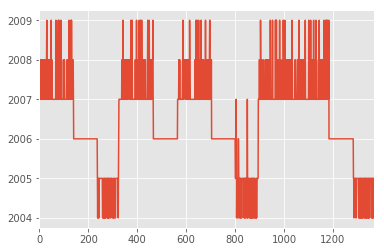

In [6]:
#  График наводит на мысль о некорректности данных
competitions_df.loc[:,'birth_year'].plot()


In [183]:
# посмотрим на данные. строки [804, 805] и [813, 814] могут быть как выбросами, так и ошибочными данными
# согласно проведенной инвестигации все эти строчки - выбросы. данные в них корректны

competitions_df.loc[800:830,:]

,place,last_name,first_name,birth_year,city,team,country,result,disc,points,athlete_group,distance,style,date,pool_city,pool_description,id,pool_size,result_s,gender
800,62,Третьяк,Филат,2006,Минск,Волна,BLR,00:02:05.75,NaN,93.0,Мальчики 2006 г.р.,100,брасс,2019-04-23,г.Жлобин,бассейн 50м.,845,50,125.75,М
801,1,Радькова,Анастасия,2005,Гомель,Гомсельмаш,BLR,00:01:12.80,NaN,442.0,Девушки 2004-2005 г.р.,100,баттерфляй,2019-04-23,г.Жлобин,бассейн 50м.,850,50,72.8,Д
802,2,Катиленец,София,2005,Гомель-2,ГОЦОР ввс,BLR,00:01:17.56,NaN,366.0,Девушки 2004-2005 г.р.,100,баттерфляй,2019-04-23,г.Жлобин,бассейн 50м.,851,50,77.56,Д
803,3,Лупеева,Ульяна,2005,Гомель,СДЮШОР 7,BLR,00:01:22.27,NaN,306.0,Девушки 2004-2005 г.р.,100,баттерфляй,2019-04-23,г.Жлобин,бассейн 50м.,852,50,82.27,Д
804,4,Евминенко,София,2007,Долгопрудный,ДЮСШ,RUS,00:01:16.35,NaN,383.0,Девушки 2004-2005 г.р.,100,баттерфляй,2019-04-23,г.Жлобин,бассейн 50м.,853,50,76.35,Д
805,5,Осадчева,Ангелина,2006,Гомель,СДЮШОР 7,BLR,00:01:32.94,NaN,212.0,Девушки 2004-2005 г.р.,100,баттерфляй,2019-04-23,г.Жлобин,бассейн 50м.,854,50,92.94,Д
806,1,Шнитко,Константин,2004,Новополоцк,Нафтан,BLR,00:01:04.94,NaN,451.0,Юноши 2004,2005,г.р. 100 баттерфляй,2019-04-23,г.Жлобин,бассейн 50м.,858,50,64.94,М
807,2,Масюкевич,Платон,2005,Гомель-1,ГОЦОР ввс,BLR,00:01:07.38,NaN,404.0,Юноши 2004,2005,г.р. 100 баттерфляй,2019-04-23,г.Жлобин,бассейн 50м.,859,50,67.38,М
808,3,Лалаян,Георгий,2005,Долгопрудный,ДЮСШ,RUS,00:01:13.12,NaN,316.0,Юноши 2004,2005,г.р. 100 баттерфляй,2019-04-23,г.Жлобин,бассейн 50м.,860,50,73.12,М
809,4,Клюй,Никита,2005,Минск,Янтарь,BLR,00:01:14.62,NaN,297.0,Юноши 2004,2005,г.р. 100 баттерфляй,2019-04-23,г.Жлобин,бассейн 50м.,861,50,74.62,М


In [184]:
#со списком соревнований тоже не все хорошо (Юноши 2004-2005, 100 баттерфляй)
#возможно, есть и другие проблемы с данными

competitions_df[['distance', 'style', 'athlete_group']].drop_duplicates()

,distance,style,athlete_group
0,50,баттерфляй,Девочки 2007г.р. и моложе
52,50,баттерфляй,Мальчики 2007г.р. и моложе
140,100,на спине,Девочки 2006 г.р.
175,100,на спине,Мальчики 2006 г.р.
237,400,вольный стиль,Девушки 2004-2005 г.р.
258,400,вольный стиль,Юноши 2004-2005 г.р.
325,50,вольный стиль,Девочки 2007г.р. и моложе
377,50,вольный стиль,Мальчики 2007г.р. и моложе
466,100,вольный стиль,Девочки 2006г.р.
502,100,вольный стиль,Мальчики 2006г.р.


**Исправим ошибки**

In [185]:
# "поплывшие атрибуты". Проблемные записи:

competitions_df[competitions_df['athlete_group'] == 'Юноши 2004'].head()

,place,last_name,first_name,birth_year,city,team,country,result,disc,points,athlete_group,distance,style,date,pool_city,pool_description,id,pool_size,result_s,gender
806,1,Шнитко,Константин,2004,Новополоцк,Нафтан,BLR,00:01:04.94,NaN,451.0,Юноши 2004,2005,г.р. 100 баттерфляй,2019-04-23,г.Жлобин,бассейн 50м.,858,50,64.94,М
807,2,Масюкевич,Платон,2005,Гомель-1,ГОЦОР ввс,BLR,00:01:07.38,NaN,404.0,Юноши 2004,2005,г.р. 100 баттерфляй,2019-04-23,г.Жлобин,бассейн 50м.,859,50,67.38,М
808,3,Лалаян,Георгий,2005,Долгопрудный,ДЮСШ,RUS,00:01:13.12,NaN,316.0,Юноши 2004,2005,г.р. 100 баттерфляй,2019-04-23,г.Жлобин,бассейн 50м.,860,50,73.12,М
809,4,Клюй,Никита,2005,Минск,Янтарь,BLR,00:01:14.62,NaN,297.0,Юноши 2004,2005,г.р. 100 баттерфляй,2019-04-23,г.Жлобин,бассейн 50м.,861,50,74.62,М
810,5,Крот,Руслан,2004,Калинковичи,ДЮСШ,BLR,00:01:17.97,NaN,260.0,Юноши 2004,2005,г.р. 100 баттерфляй,2019-04-23,г.Жлобин,бассейн 50м.,862,50,77.97,М


In [0]:
competitions_df.loc[competitions_df['athlete_group'] == 'Юноши 2004', 'distance'] = 100
competitions_df.loc[competitions_df['athlete_group'] == 'Юноши 2004', 'style'] = 'баттерфляй'
competitions_df.loc[competitions_df['athlete_group'] == 'Юноши 2004', 'athlete_group'] = 'Юноши 2004-2005 г.р.'

#перепроверим список соревнований
#competitions_df[['distance', 'style', 'athlete_group']].drop_duplicates()


In [187]:
#посмотрим на число участников соревнований

competitions_df.groupby(['distance', 'style', 'athlete_group']).size()

distance  style                 athlete_group             
50        баттерфляй            Девочки 2007г.р. и моложе     52
                                Мальчики 2007г.р. и моложе    88
          брасс                 Девочки 2007г.р. и моложе     51
                                Мальчики 2007г.р. и моложе    88
          вольный стиль         Девочки 2007г.р. и моложе     52
                                Мальчики 2007г.р. и моложе    89
          на спине              Девочки 2007г.р. и моложе     52
                                Мальчики 2007г.р. и моложе    89
100       баттерфляй            Девушки 2004-2005 г.р.         5
                                Юноши 2004-2005 г.р.           9
          брасс                 Девочки 2006 г.р.             35
                                Девушки 2004-2005 г.р          5
                                Мальчики 2006 г.р.            62
                                Юноши 2004-2005 г.р.          14
          вольный стиль        

**Отмечаем странности в данных выше**

Несколько раз на стометровках видим "Девушки 2004-2005 г.р.         5"

В случае вольного стиля 100м        "Девушки 2004-2005 г.р.        44"

---



Юноши 2004-2005 г.р. есть на всех стометровках кроме вольного стиля


In [188]:
competitions_df[
     (competitions_df['athlete_group'] == 'Девушки 2004-2005 г.р.') & \
     (competitions_df['distance'] == 100) & \
     (competitions_df['style'] == 'вольный стиль')
][['place','first_name','last_name','birth_year','athlete_group']]

,place,first_name,last_name,birth_year,athlete_group
851,1,Ксения,Наумова,2005,Девушки 2004-2005 г.р.
852,2,Марина,Горовая,2004,Девушки 2004-2005 г.р.
853,3,Дарья,Парванова,2004,Девушки 2004-2005 г.р.
854,4,Ксения,Котягова,2005,Девушки 2004-2005 г.р.
855,5,Кристина,Хлистунова,2005,Девушки 2004-2005 г.р.
856,6,Инна,Болдырева,2005,Девушки 2004-2005 г.р.
857,7,Диана,Андрусевич,2005,Девушки 2004-2005 г.р.
858,8,Анастасия,Подвязнова,2005,Девушки 2004-2005 г.р.
859,1,Никита,Дедушкевич,2004,Девушки 2004-2005 г.р.
860,2,Илья,Мамонтов,2004,Девушки 2004-2005 г.р.


In [189]:
#мальчики попали в "девичью" группу. скорее всего, они есть и в мужской группе
#поищем "дубликаты", т.е. тех, кто попал в несколько групп сразу 

groups_df = competitions_df.groupby(['first_name', 'last_name'])['athlete_group']
groups_df.unique()

#данные нуждаются в очистке

first_name  last_name  
Александр   Алексеев                 [Мальчики 2006 г.р., Мальчики 2006г.р.]
            Бальков                                 [Девушки 2004-2005 г.р.]
            Бугдусевич                          [Мальчики 2007г.р. и моложе]
            Ковалев              [Юноши 2004-2005 г.р., Юноши 2004-2005г.р.]
            Ракомский      [Юноши 2004-2005 г.р., Девушки 2004-2005 г.р.,...
            Раманюга                 [Мальчики 2006 г.р., Мальчики 2006г.р.]
            Чичкан                   [Мальчики 2006 г.р., Мальчики 2006г.р.]
Александра  Горбач                     [Девочки 2006 г.р., Девочки 2006г.р.]
            Козлова                              [Девочки 2007г.р. и моложе]
            Матвеенко                  [Девочки 2006 г.р., Девочки 2006г.р.]
            Яцук                                 [Девочки 2007г.р. и моложе]
Алексей     Киринский                           [Мальчики 2007г.р. и моложе]
            Лашкевич                 [Мальчики 2006 

**Часто повторяющиеся "разночтения"  в названиях групп:**

'Мальчики 2006 г.р.' 'Мальчики 2006г.р.'

'Юноши 2004-2005 г.р.' 'Юноши 2004-2005г.р.'

'Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.' 'Юноши 2004-2005г.р.'

'Девочки 2006 г.р.' 'Девочки 2006г.р.'

'Девушки 2004-2005 г.р.' 'Девушки 2004-2005 г.р' 'Девушки 2004-2005г.р.'

In [190]:
# наводим порядок:
def clean_column_data(column, old_value, new_value, filter=True):
  competitions_df.loc[filter & (competitions_df[column] == old_value), column] = new_value
  
clean_column_data('athlete_group', 'Мальчики 2006г.р.', 'Мальчики 2006 г.р.')
clean_column_data('athlete_group', 'Юноши 2004-2005г.р.', 'Юноши 2004-2005 г.р.')
clean_column_data('athlete_group', 'Девочки 2006г.р.', 'Девочки 2006 г.р.')
clean_column_data('athlete_group', 'Девушки 2004-2005 г.р', 'Девушки 2004-2005 г.р.')
clean_column_data('athlete_group', 'Девушки 2004-2005г.р.', 'Девушки 2004-2005 г.р.')

#перепроверим список групп для каждого спортсмена
groups_df = competitions_df.groupby(['first_name', 'last_name'])['athlete_group']
groups_df.unique()


first_name  last_name  
Александр   Алексеев                                 [Мальчики 2006 г.р.]
            Бальков                              [Девушки 2004-2005 г.р.]
            Бугдусевич                       [Мальчики 2007г.р. и моложе]
            Ковалев                                [Юноши 2004-2005 г.р.]
            Ракомский      [Юноши 2004-2005 г.р., Девушки 2004-2005 г.р.]
            Раманюга                                 [Мальчики 2006 г.р.]
            Чичкан                                   [Мальчики 2006 г.р.]
Александра  Горбач                                    [Девочки 2006 г.р.]
            Козлова                           [Девочки 2007г.р. и моложе]
            Матвеенко                                 [Девочки 2006 г.р.]
            Яцук                              [Девочки 2007г.р. и моложе]
Алексей     Киринский                        [Мальчики 2007г.р. и моложе]
            Лашкевич                                 [Мальчики 2006 г.р.]
            Лу

In [191]:
# для всех оставшихся записей с несколькими группами на человека меняем вторую группу на первую

for k, g in groups_df:
  gr_list = g.unique()
  if len(gr_list) > 1:
    print(k, gr_list)
    clean_column_data( 
                      column='athlete_group', 
                      old_value=gr_list[1], 
                      new_value=gr_list[0],
                      filter=(competitions_df['first_name'] == k[0]) & (competitions_df['last_name'] == k[1])
                     )


('Александр', 'Ракомский') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Антон', 'Янков') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Богдан', 'Орловский') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Вадим', 'Безбородько') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Влад', 'Фрошин') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Владислав', 'Круковский') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Вячеслав', 'Балахонов') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Вячеслав', 'Медведев') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Данила', 'Акульков') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Данила', 'Быхавцов') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Денис', 'Лебенков') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Денис', 'Мохорев') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Денис', 'Мудриченко') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Дмитрий', 'Лаппо') ['Юноши 2004-2005 г.р.'

In [192]:
# посмотрим еще раз на число участников соревнований

competitions_df.groupby(['distance', 'style', 'athlete_group']).size()

# сейчас все выглядит более правдоподобно. почти все исправлено. 

distance  style                 athlete_group             
50        баттерфляй            Девочки 2007г.р. и моложе     52
                                Мальчики 2007г.р. и моложе    88
          брасс                 Девочки 2007г.р. и моложе     51
                                Мальчики 2007г.р. и моложе    88
          вольный стиль         Девочки 2007г.р. и моложе     52
                                Мальчики 2007г.р. и моложе    89
          на спине              Девочки 2007г.р. и моложе     52
                                Мальчики 2007г.р. и моложе    89
100       баттерфляй            Девушки 2004-2005 г.р.         5
                                Мальчики 2006 г.р.             1
                                Юноши 2004-2005 г.р.           8
          брасс                 Девочки 2006 г.р.             35
                                Девушки 2004-2005 г.р.         5
                                Мальчики 2006 г.р.            62
                               

In [0]:
# если пройтись по предыдущим выборкам найдется еще неск ошибочных записей:

# 879 	21 	      NaN 	Петрович 	2005 	Девушки 2004-2005 г.р.  
# 894 	36 	Александр 	Бальков 	2005 	Девушки 2004-2005 г.р.

competitions_df.loc[[879, 894], 'athlete_group'] = 'Юноши 2004-2005 г.р.'


**Поле 'gender' нужно снова обновить!!!**

*группы поменяли свое название, некоторые "девочки" стали "мальчиками"*

In [194]:
competitions_df['athlete_group'].unique()

array(['Девочки 2007г.р. и моложе', 'Мальчики 2007г.р. и моложе',
       'Девочки 2006 г.р.', 'Мальчики 2006 г.р.',
       'Девушки 2004-2005 г.р.', 'Юноши 2004-2005 г.р.'], dtype=object)

In [195]:
# размечаем данные снова

group_gender_dict = dict(zip(list(competitions_df['athlete_group'].unique()), ['Д', 'М', 'Д', 'М', 'Д', 'М']))

print(group_gender_dict)

{'Девочки 2007г.р. и моложе': 'Д', 'Мальчики 2007г.р. и моложе': 'М', 'Девочки 2006 г.р.': 'Д', 'Мальчики 2006 г.р.': 'М', 'Девушки 2004-2005 г.р.': 'Д', 'Юноши 2004-2005 г.р.': 'М'}


In [0]:
# вычленяем пол

for group, gender in group_gender_dict.items():
   competitions_df.loc[competitions_df['athlete_group'] == group, 'gender'] = gender

**Разделим множество строк на подмножества с результатами и дисквалификацией**

In [197]:
disc_df = competitions_df[competitions_df['result'].isnull()]
competitions_df = competitions_df[~competitions_df['result'].isnull()]

print(competitions_df.shape)
print(disc_df.shape)

(1358, 20)
(12, 20)


**Нарисуем несколько графиков, чтоб лучше "понять" данные**

In [0]:
# competitions_df['athlete_group'].hist()

competitions_df['athlete_group']
X=list(competitions_df['athlete_group'].unique())
Y=[len(competitions_df[competitions_df['athlete_group']==x]) for x in X]
# print(Y)
# print(X)

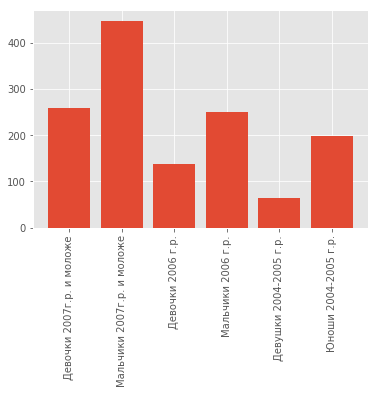

In [198]:
plt.bar(x=X, height=Y)
plt.xticks(rotation=90)
plt.show()

In [0]:
# подготовим данные с результатами 4х различных групп на одной дистанции

filter_group_female_2004 = (competitions_df['athlete_group'] == 'Девушки 2004-2005 г.р.')
filter_group_female_2006 = (competitions_df['athlete_group'] == 'Девочки 2006 г.р.')
filter_group_male_2004 = (competitions_df['athlete_group'] == 'Юноши 2004-2005 г.р.')
filter_group_male_2006 = (competitions_df['athlete_group'] == 'Мальчики 2006 г.р.')

filter_style = (competitions_df['style'] == 'комплексное плавание')
filter_distance = (competitions_df['distance'] == 200)

df_female_2004 = competitions_df[filter_group_female_2004 & filter_style & filter_distance].iloc[:100,:] \
             .sort_values(by=['result_s'], ascending=[False])[['place', 'points', 'result_s']]
df_female_2006 = competitions_df[filter_group_female_2006 & filter_style & filter_distance].iloc[:100,:] \
             .sort_values(by=['result_s'], ascending=[False])[['place', 'points', 'result_s']]
df_male_2004 = competitions_df[filter_group_male_2004 & filter_style & filter_distance].iloc[:100,:] \
             .sort_values(by=['result_s'], ascending=[False])[['place', 'points', 'result_s']]
df_male_2006 = competitions_df[filter_group_male_2006 & filter_style & filter_distance].iloc[:100,:] \
             .sort_values(by=['result_s'], ascending=[False])[['place', 'points', 'result_s']]

# competitions_df[filter_group_female_2006 & filter_style & filter_distance]

**График место/время**

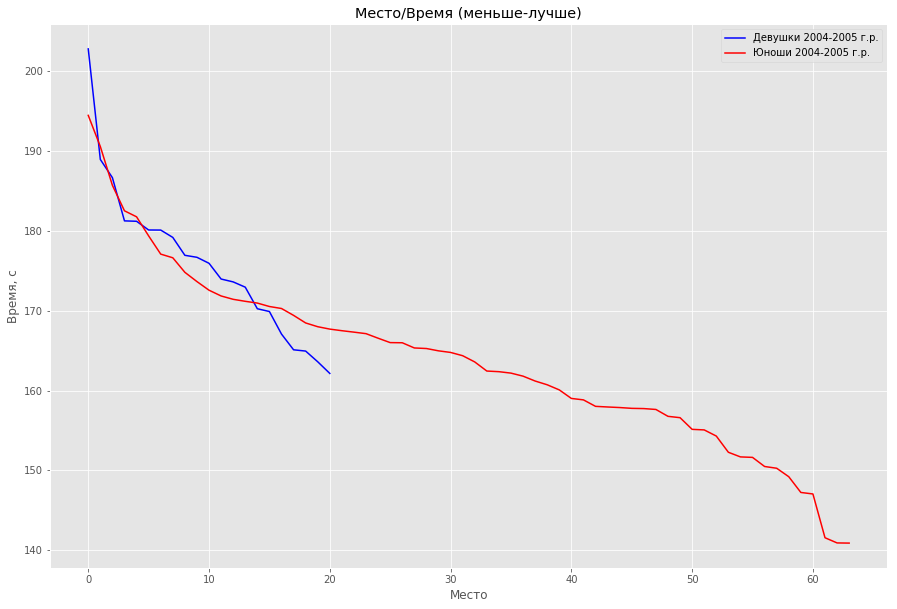

In [200]:
plt.figure(figsize=(15,10))

plt.plot(range(len(df_female_2004)), df_female_2004['result_s'], color='blue', label='Девушки 2004-2005 г.р.')
plt.plot(range(len(df_male_2004)), df_male_2004['result_s'], color='red', label='Юноши 2004-2005 г.р.')
# plt.plot(range(len(df_female_2006)), df_female_2006['result_s'], color='lightblue', label='Девочки 2006 г.р.')
# plt.plot(range(len(df_male_2006)), df_male_2006['result_s'], color='magenta', label='Мальчики 2006 г.р.')

plt.xlabel('Место')
plt.ylabel('Время, с')
plt.legend(loc='upper right')
plt.title('Место/Время (меньше-лучше)')
plt.show()

*Кривые накладываются друг на друга, восприятие данных осложнено*

Попробуем *points* как целевой признак (вместо *result_s*)

**График место/очки:**

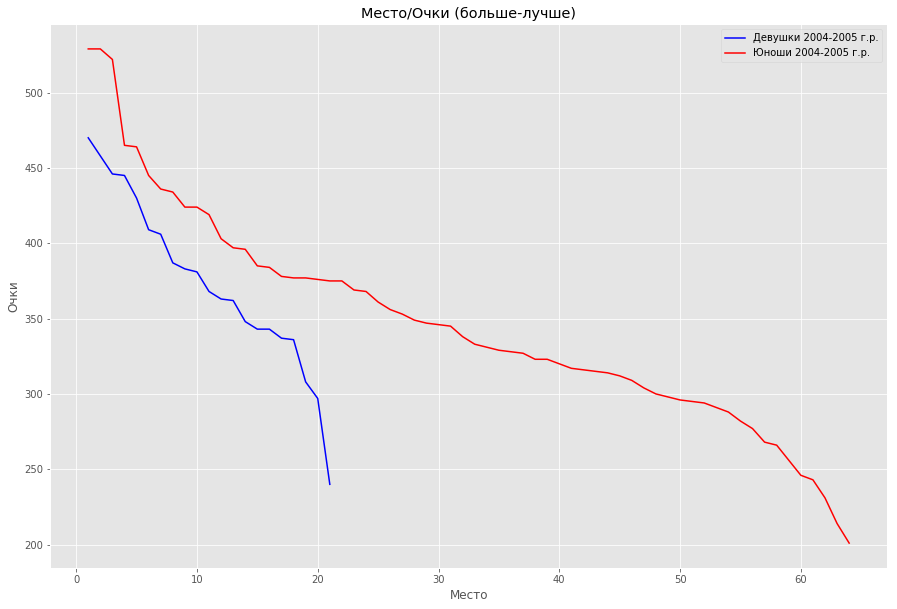

In [201]:
plt.figure(figsize=(15,10))

plt.plot(range(len(df_female_2004), 0, -1), df_female_2004['points'], color='blue', label='Девушки 2004-2005 г.р.')
plt.plot(range(len(df_male_2004), 0, -1), df_male_2004['points'], color='red', label='Юноши 2004-2005 г.р.')
# plt.plot(range(len(df_female_2006), 0, -1), df_female_2006['points'], color='lightblue', label='Девочки 2006 г.р.')
# plt.plot(range(len(df_male_2006), 0, -1), df_male_2006['points'], color='magenta', label='Мальчики 2006 г.р.')

plt.xlabel('Место')
plt.ylabel('Очки')
plt.legend(loc='upper right')
plt.title('Место/Очки (больше-лучше)')
plt.show()

Очевидно, время и очки коррелируют друг с другом. 

Вместе с тем, очки - лучший выбор для целевого признака когда мы сравниваем мальчиков и девочек

Кривые четко отделены друг от друга. 

In [0]:
# Сохраним очищенные данные в csv

competitions_df.to_csv('Competitions_results_cleaned.csv', index=None)
disc_df.to_csv('Competitions_disc_cleaned.csv', index=None)